In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(linewidth=500, precision=1, suppress=True, floatmode='fixed')

In [17]:
# url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
local = 'auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration', 'modelyear', 'origin']

R = pd.read_csv(local, 
                names=column_names, 
                na_values='?', 
                comment='\t', 
                sep=' ', 
                skipinitialspace=True)

In [18]:
# Clone the dataset for preprocessing
D = R.copy()
D

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [19]:
# Describe the dataset
D.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
modelyear,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [20]:
# Remove rows with a mising value (?)
D.dropna(inplace=True)

In [21]:
# Ordered Encoding for cylinders

D['p_cy1'] = (D['cylinders'] >= 3).astype(float)
D['p_cy2'] = (D['cylinders'] >= 4).astype(float)
D['p_cy3'] = (D['cylinders'] >= 5).astype(float)
D['p_cy4'] = (D['cylinders'] >= 6).astype(float)
D['p_cy5'] = (D['cylinders'] >= 7).astype(float)

In [22]:
# Normalize continuous attributes

# attr = 'cylinders'
# x_min = np.min(D[attr])
# x_max = np.max(D[attr])
# D['p_' + attr] = (D[attr] - x_min)/(x_max - x_min)

attr = 'displacement'
x_min = np.min(D[attr])
x_max = np.max(D[attr])
D['p_' + attr] = (D[attr] - x_min)/(x_max - x_min)

attr = 'horsepower'
x_min = np.min(D[attr])
x_max = np.max(D[attr])
D['p_' + attr] = (D[attr] - x_min)/(x_max - x_min)

attr = 'weight'
x_min = np.min(D[attr])
x_max = np.max(D[attr])
D['p_' + attr] = (D[attr] - x_min)/(x_max - x_min)

attr = 'acceleration'
x_min = np.min(D[attr])
x_max = np.max(D[attr])
D['p_' + attr] = (D[attr] - x_min)/(x_max - x_min)

In [23]:
# Use ordered encoding for modelyear attribute
D['p_year1'] = (D['modelyear'] >= 73).astype(float)
D['p_year2'] = (D['modelyear'] >= 76).astype(float)
D['p_year3'] = (D['modelyear'] >= 79).astype(float)

In [24]:
# Use one-hot encoding for origin
D['p_us']     = (D['origin'] == 1).astype(float)
D['p_europe'] = (D['origin'] == 2).astype(float)
D['p_japan']  = (D['origin'] == 3).astype(float)

In [25]:
# Select only preprocessed columns
preprocessed_columns = [cname for cname in D.columns if cname[0:2] == 'p_']
X = D[preprocessed_columns].to_numpy()

In [26]:
D[preprocessed_columns]

,p_cy1,p_cy2,p_cy3,p_cy4,p_cy5,p_displacement,p_horsepower,p_weight,p_acceleration,p_year1,p_year2,p_year3,p_us,p_europe,p_japan
0,1.0,1.0,1.0,1.0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,1.0,1.0,0.0,0.0,0.0,0.186047,0.217391,0.333711,0.452381,1.0,1.0,1.0,1.0,0.0,0.0
394,1.0,1.0,0.0,0.0,0.0,0.074935,0.032609,0.146583,0.988095,1.0,1.0,1.0,0.0,1.0,0.0
395,1.0,1.0,0.0,0.0,0.0,0.173127,0.206522,0.193365,0.214286,1.0,1.0,1.0,1.0,0.0,0.0
396,1.0,1.0,0.0,0.0,0.0,0.134367,0.179348,0.286929,0.630952,1.0,1.0,1.0,1.0,0.0,0.0


In [27]:
# Prepare the target output
y = D['mpg'].to_numpy()

In [28]:
X.shape

(392, 15)

In [29]:
import random
indices = list(range(X.shape[0]))
random.shuffle(indices)
n_train = int(X.shape[0]*.8)
X_train = X[indices[:n_train], :]
y_train = y[indices[:n_train]]
X_test = X[indices[n_train:], :]
y_test = y[indices[n_train:]]

In [36]:
# Define a model
m = X_train.shape[1]
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(m,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
# Train the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[])
history1_lr1en1 = model.fit(X_train, y_train, epochs=1000, batch_size=512, shuffle=True)

Epoch 1/1000
1/1 [==============================] - 0s 219ms/step - loss: 23.1850
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 23.1314
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 23.0771
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 23.0222
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 22.9662
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 22.9090
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 22.8503
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 22.7902
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 22.7284
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 22.6643
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 22.5983
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 22.5296
Epoch 13/1000


2022-10-19 10:23:11.172889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 6ms/step - loss: 22.4578
Epoch 14/1000
1/1 [==============================] - 0s 7ms/step - loss: 22.3828
Epoch 15/1000
1/1 [==============================] - 0s 7ms/step - loss: 22.3046
Epoch 16/1000
1/1 [==============================] - 0s 7ms/step - loss: 22.2233
Epoch 17/1000
1/1 [==============================] - 0s 6ms/step - loss: 22.1388
Epoch 18/1000
1/1 [==============================] - 0s 7ms/step - loss: 22.0507
Epoch 19/1000
1/1 [==============================] - 0s 6ms/step - loss: 21.9589
Epoch 20/1000
1/1 [==============================] - 0s 6ms/step - loss: 21.8631
Epoch 21/1000
1/1 [==============================] - 0s 6ms/step - loss: 21.7630
Epoch 22/1000
1/1 [==============================] - 0s 6ms/step - loss: 21.6584
Epoch 23/1000
1/1 [==============================] - 0s 7ms/step - loss: 21.5489
Epoch 24/1000
1/1 [==============================] - 0s 6ms/step - loss: 21.4341
Epoch 25/1000
1/1 [=======================

In [37]:
y_hat = model.predict(X_test)

3/3 [==============================] - 0s 8ms/step


2022-10-19 10:23:23.004957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


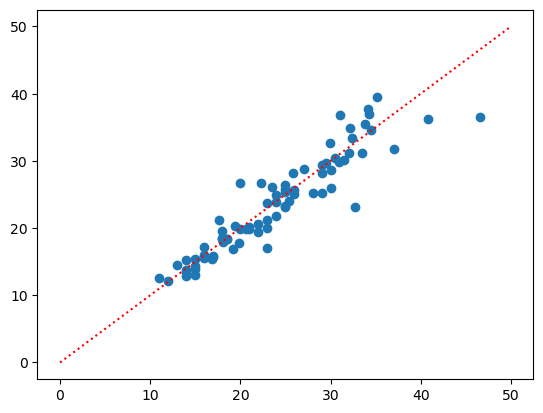

In [38]:
y_hat = np.ravel(y_hat)
plt.plot([0,50], [0, 50], linestyle='dotted', color='red')
plt.scatter(y_test, y_hat)